# Data exploration with pandas and sklearn

## The goal of this homework is to discover structure in an unlabeled dataset. The observations in this dataset belong to several different clusters. The specific goal is to identify how many clusters there are and to which cluster each point belongs.

## Question 1 (5 points). Load the dataset into a pandas dataframe. Each row represents a single observation; the values in the columns are numeric features recorded for that observation (in other words, this is a 'tidy' dataset). How many rows and columns are there? What is the dimension of this dataset? In other words, how many different features are there for each observation?

In [56]:
# Importing correct packages
%matplotlib inline
import matplotlib.pyplot as plt # for plotting
import pandas as pd # pandas
import numpy as np #numpy

datafile = 'data/dataset.csv' #reading in our csv file

df = pd.read_csv(datafile) # dataframe our datafile

#print(df.head())  # to look at the top features and column names
print(df) #quick glance at our dataframe
print('There are',len(df.index), 'features for each of the', len(df.columns), 'observations.')


       dim1    dim2    dim3    dim4    dim5    dim6    dim7    dim8    dim9  \
0     3.371  16.877  15.345   8.080   8.510  14.404   5.904  -0.368  11.604   
1    11.765  18.278   9.311   4.095  13.699   1.487  16.061   7.425   5.981   
2     3.966   2.498   9.110  12.823  -0.337  15.771   5.326  18.289  12.466   
3    11.498  16.627  10.134   3.632  13.124   1.083  17.141   8.624   6.133   
4    12.262  18.252  10.158   4.073  14.841   2.451  15.654   8.131   5.142   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
491  12.001  18.166   9.695   3.458  14.827   1.261  16.496   8.015   5.047   
492  12.440  17.676   9.743   3.566  14.047   1.006  16.271   7.548   5.434   
493  11.954  17.943  10.675   3.549  13.317   2.244  16.153   8.085   5.463   
494  12.437  18.111  10.817   4.416  14.656   2.432  15.519   7.902   6.377   
495   0.110  17.494   3.912   4.218   9.507  16.815   1.395  13.720   8.260   

      dim10  
0     3.321  
1    -0.338  
2     9.6

## Question 2 (5 points). Make a scatter plot of `dim1` versus `dim2`, ie the first column versus the second one. How many clusters do you see in this plot?

There are a total of three clusters visible when plotting dim1 against dim2.


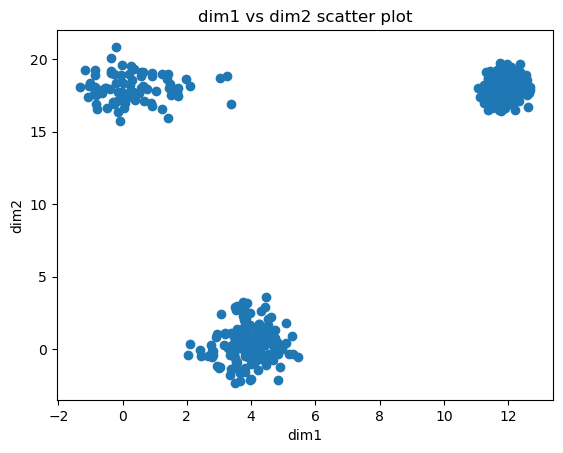

In [57]:
# You could use either 
#
xvals=df['dim1']
yvals=df['dim2']
plt.scatter(xvals, yvals) #with appropriate choices for xvals and yvals (see lecture 10 for examples) 
plt.title('dim1 vs dim2 scatter plot') #title
plt.xlabel('dim1') #xlabel
plt.ylabel('dim2') #ylabel

print('There are a total of three clusters visible when plotting dim1 against dim2.')


## Question 3 (15 points). Perform principal components analysis (PCA) on the dataset, following along with the example in the lectures10and11 notebook. What fraction of the variation in the dataset is captured by the first two components? Make a plot of the first component against the second component. Now how many clusters do you see in the data? (2 points extra credit if you standardize the data first using `sklearn.preprocessing.StandardScaler`; see the lectures10and11 notebook for an example of how to do that.)

The first two components of our dataset capture 86.52889715229934 % of the variance in the data
There are 5 distinct clusters seen in our data when prjecting dim1 and dim2


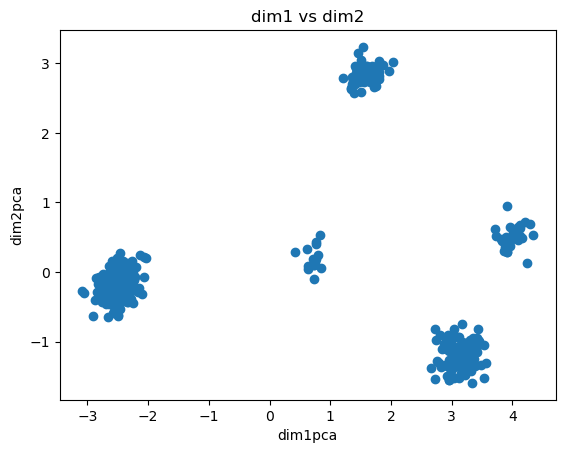

In [60]:
# start by importing the PCA class
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# df.describe()  #find out the means and standard deviations of our data
scaler = StandardScaler() #sklearn object
scaler.fit(df) #Fit the model
# print ('mean:', scaler.mean_)
# print ('variance:', scaler.var_)  #to check the application of the model
df_scaled= scaler.transform(df) #applying the fitted model
#print( np.mean(df_scaled[:,0],), np.std(df_scaled[:,0])) #check the data transformation
# 1. create and configure the model (call it "pca")
pca= PCA(n_components=10)
# 2. fit the model to the data (use pca.fit(...) )
pca.fit(df_scaled)
# 3. look at the model's explained_variance_ratio_ (i.e., pca.explained_variance_ratio_ where pca
#    is what you called the PCA object) to see how much variance the top two components capture.
print('The first two components of our dataset capture', (pca.explained_variance_ratio_[0]+pca.explained_variance_ratio_[1])*100, '% of the variance in the data')
# 4. transform the data to a new array, call it "X_pca" (use pca.transform(...) )
X_pca= pca.transform(df_scaled)
X_pca.shape
# 5. Plot the first two components, as we did in class.
plt.scatter(X_pca[: ,0], X_pca[: ,1])
plt.title('dim1 vs dim2')
plt.xlabel('dim1pca')
plt.ylabel('dim2pca')

print('There are 5 distinct clusters seen in our data when prjecting dim1 and dim2')

## Question 4 (15 points). Use the KMeans clustering algorithm from scikit-learn to assign each point in the dataset to a cluster. Configure KMeans to find a number of clusters equal to the number that you identified visually in the PCA plot from question 3. What are the sizes of the different clusters (how many points are in each cluster)? Remake the PCA scatter plot (PC1 versus PC2) colored by the cluster labels.

cluster sizes: 0    256
1    128
2     64
3     32
4     16
Name: clusters, dtype: int64


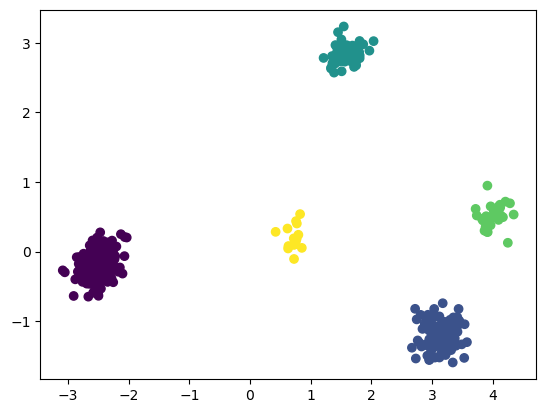

In [66]:
from sklearn.cluster import KMeans

nclust=5 # answer from Question 3

# 1. create a KMeans object, call it kmeans; you'll need to tell it how many clusters to find
kmeans= KMeans(n_clusters=5, random_state=10)
# 2. fit the object to the data using kmeans.fit
kmeans.fit(df_scaled)
# 3. Get the list of clusters using kmeans.predict
#    Name the returned array of cluster assignments "clusters"
clusters= kmeans.predict(df_scaled)
clusters
# To get the cluster sizes, first look at the array of clusters returned by kmeans.predict
#    to see that the different values are integers between 0 and nclust-1, inclusive.

# To get the size of each cluster, you could write a for loop over the different cluster
# numbers, and inside the loop you could count how many elements in clusters array are
# equal to that cluster number. Instead, do it by creating a new column in the dataframe 
# containing the cluster assignments, and using the pandas method value_counts:

df['clusters'] = clusters # create a new column in the dataframe with the KMeans cluster assignments

print('cluster sizes:', df['clusters'].value_counts()) # handy built-in counting method for Pandas Series objects

# use this code to remake the PCA plot colored by the kmeans clusters, where "clusters" is the 
#  array returned by the kmeans.predict function  
plt.scatter( X_pca[:,0], X_pca[:,1], c=clusters )



## Question 5. (10 points) Make a 'scatter matrix' plot showing each column of the original dataset plotted against each of the other 9 columns in a big 10x10 array (like we did for the iris dataset in the lectures10and11 notebook). Notice how the number of apparent clusters in the data varies depends on which pairs of features are being plotted against one another. Color the plots using the kmeans clusters like you did in the previous question.
You could use `pd.plotting.scatter_matrix` or try importing seaborn (`import seaborn as sns`) and use `sns.pairplot`. Or (optional) try both and see which looks nicer. `sns.pairplot` has a `hue` argument that you can use for coloring by passing `hue='clusters'`. See the `pd.plotting.scatter_matrix` and `sns.pairplot` examples in the lectures10and11.ipynb jupyter notebook.

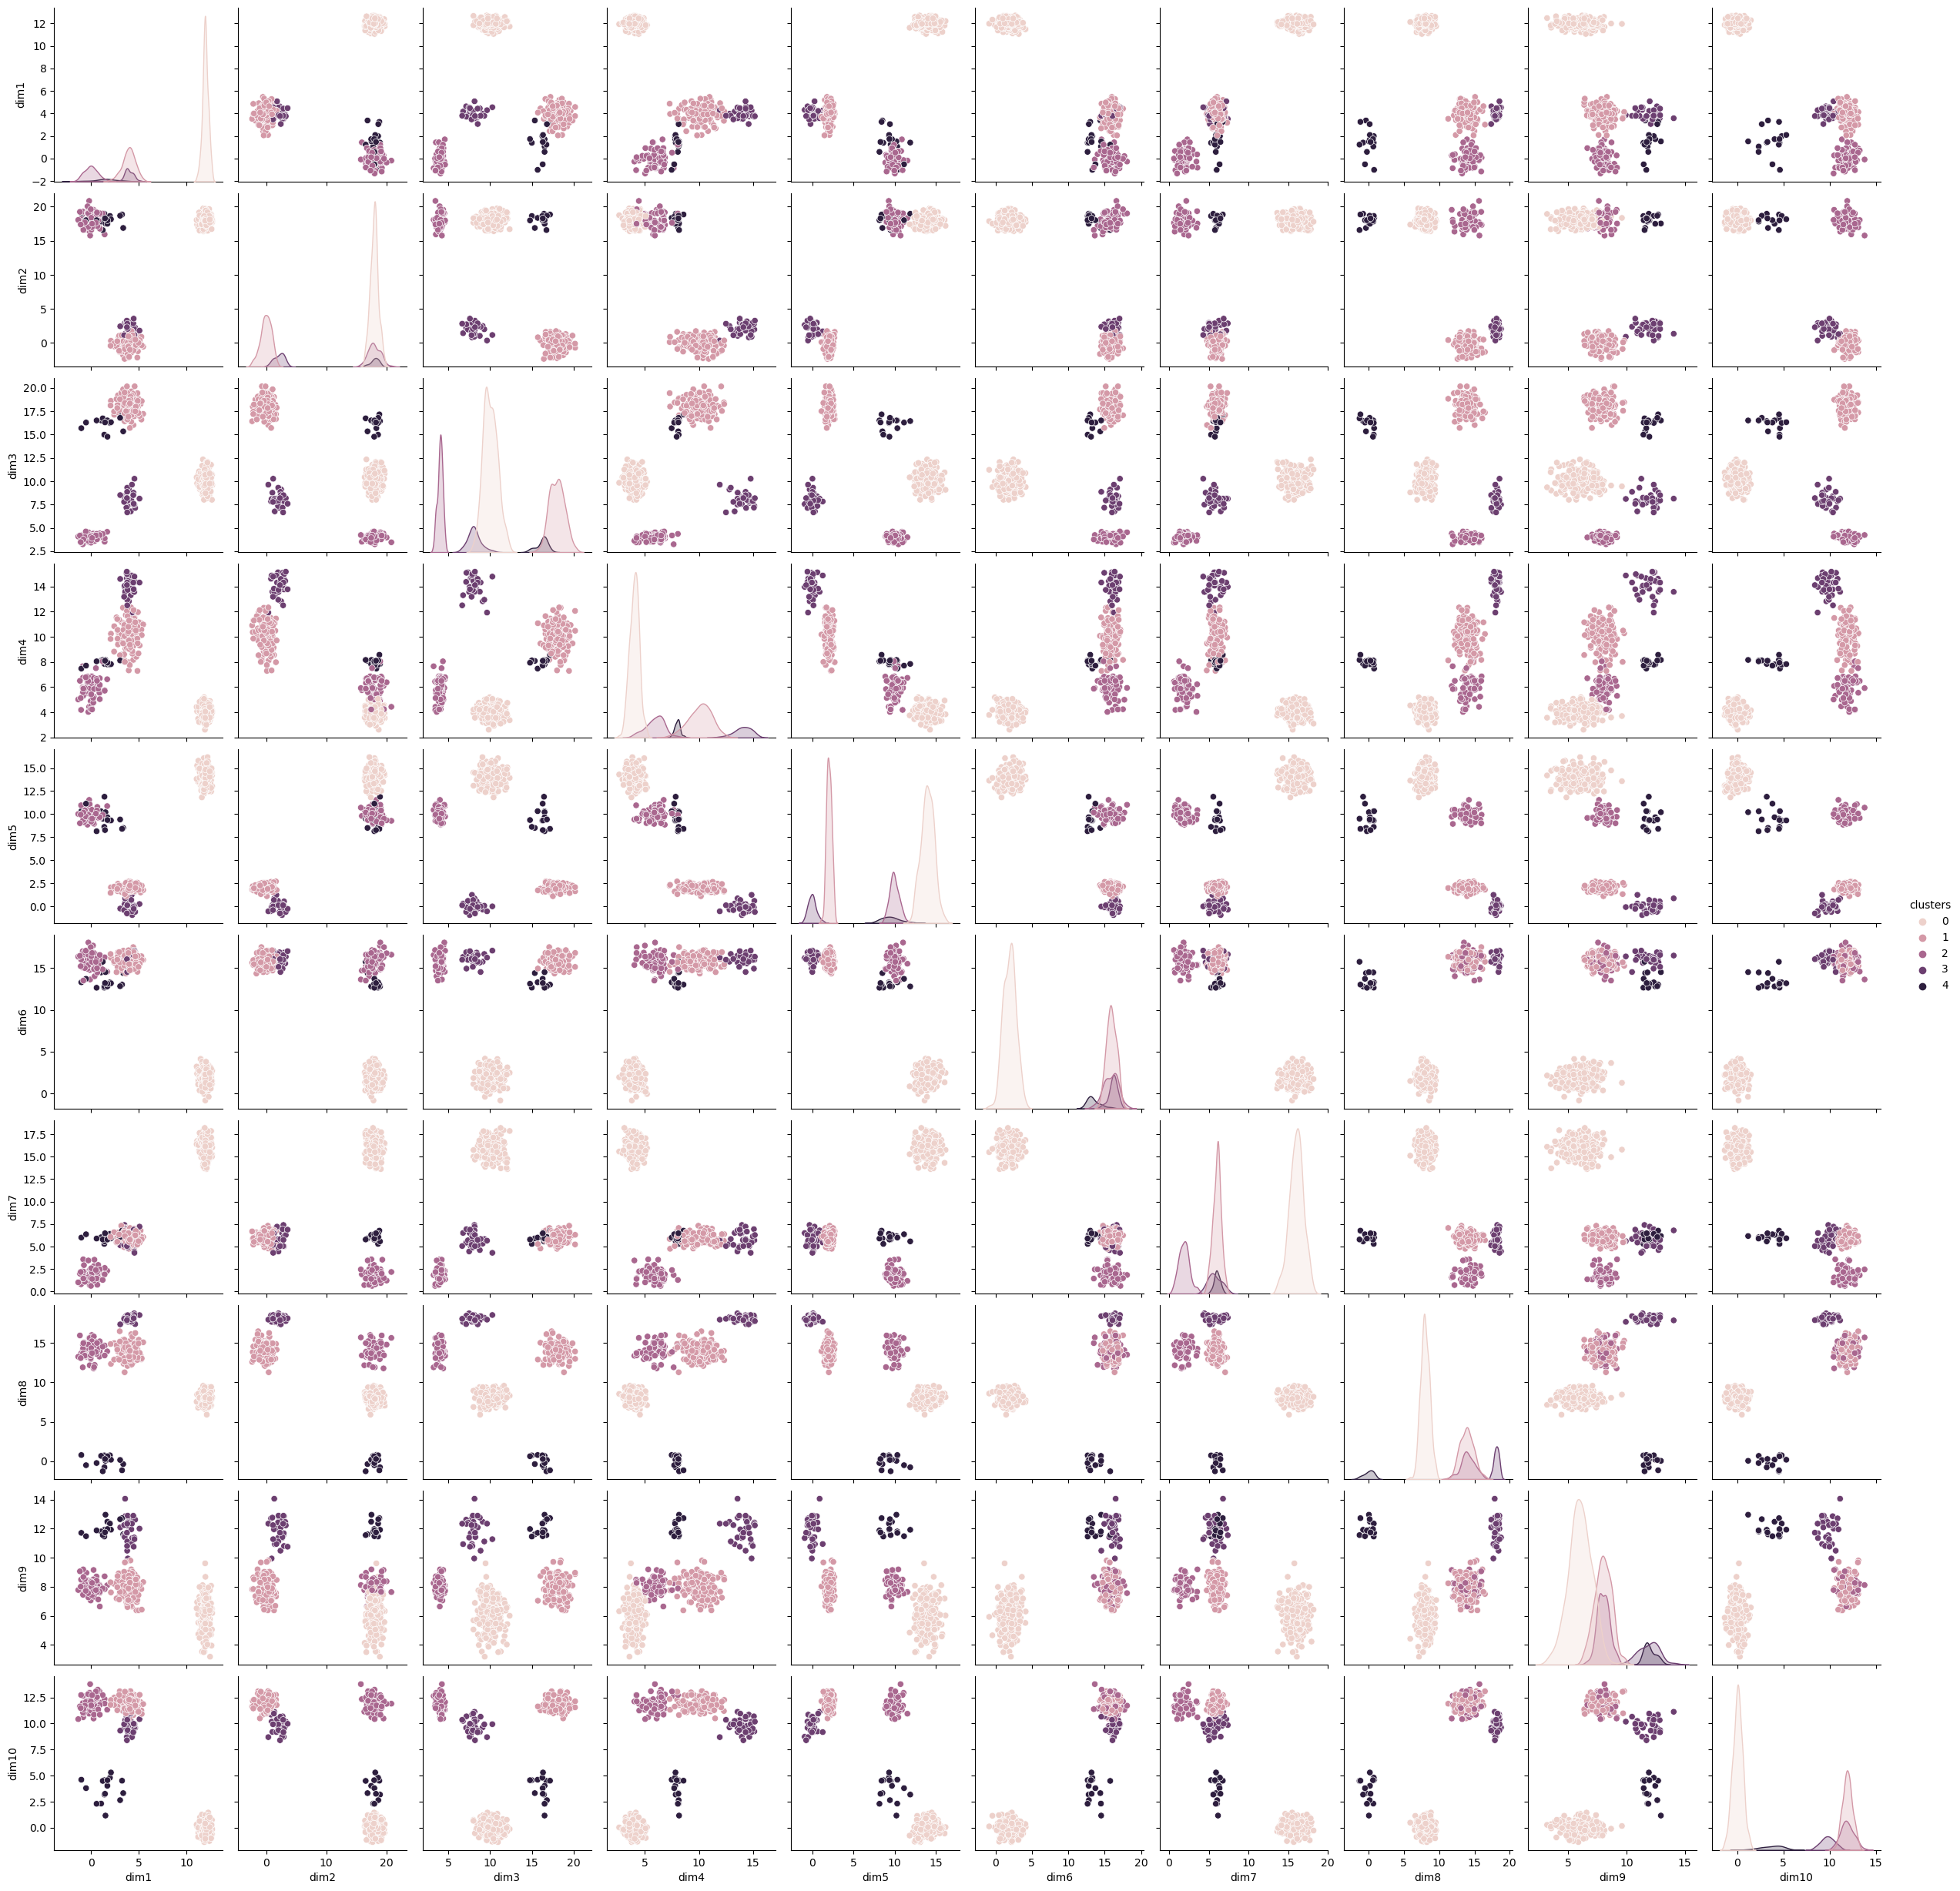

In [69]:
# put your answer here
import seaborn as sns
sns.pairplot(df, hue='clusters')

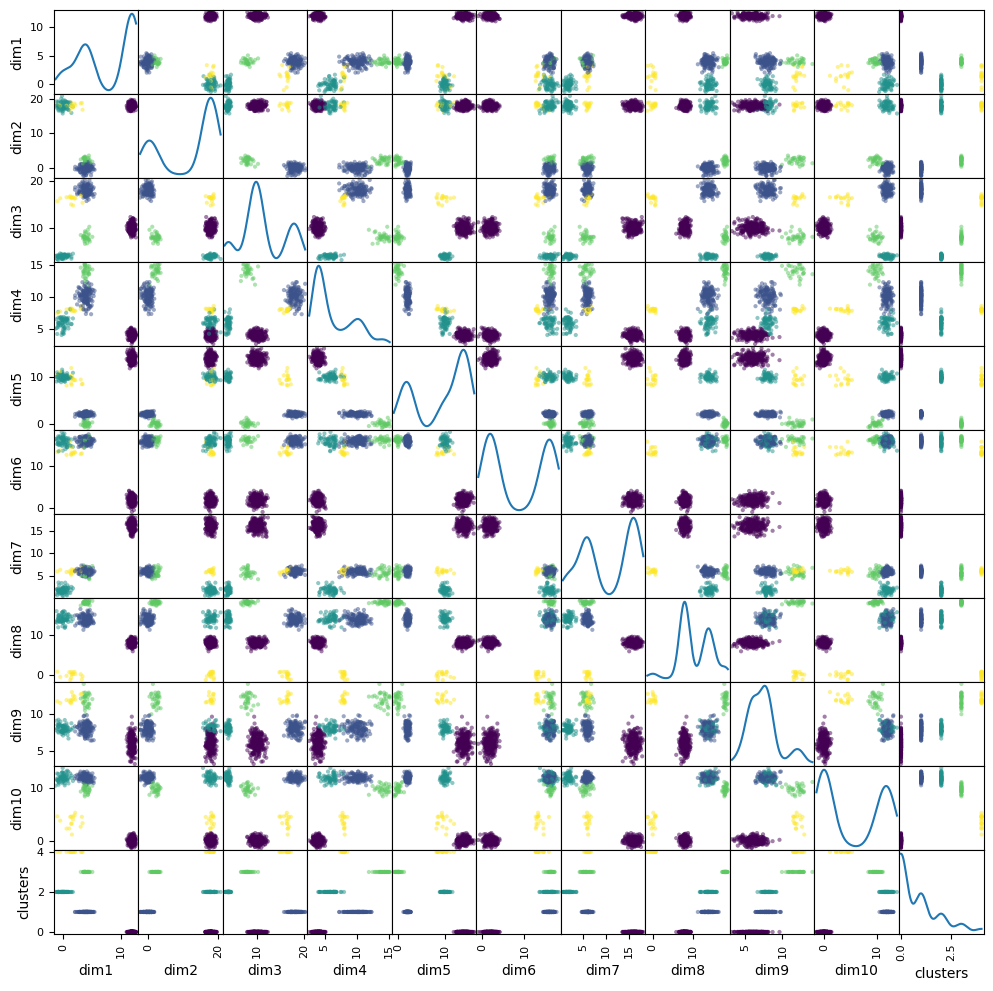

In [71]:
# and maybe also here if you are trying both and comparing...
pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(12,12), c=df['clusters']);

## Question 5. (5 points of extra credit) Use the TSNE algorithm in scikit-learn to project the dataset down into 2 dimensions. How many clusters do you see in the TSNE scatter plot?

/home/mandrade97/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/mandrade97/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


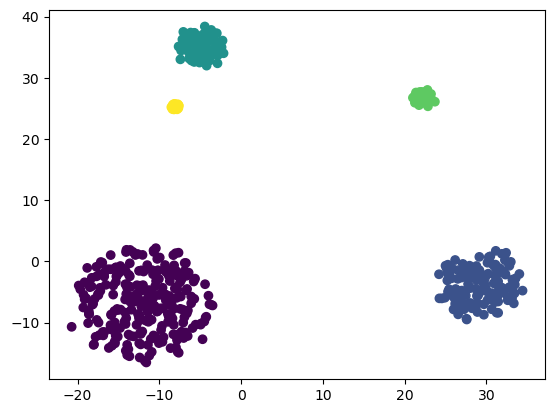

In [77]:
#using unscaled dataframe
from sklearn.manifold import TSNE

# 1. create the TSNE object, call it tsne. Tell it you want 2 components (ie, a 2D projection) 
tsne = TSNE(n_components=2)
# 2. Fit the data to the model and transform to a new array (call it X_tsne) using tsne.fit_transform
#     This combines the fit and transform steps into a single operation.
X_tsne= tsne.fit_transform(df)

# Use this matplotlib command to make a scatter plot of the two components, colored by the 
#  kmeans cluster assignments
plt.scatter( X_tsne[:,0], X_tsne[:,1], c=clusters )


/home/mandrade97/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/mandrade97/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


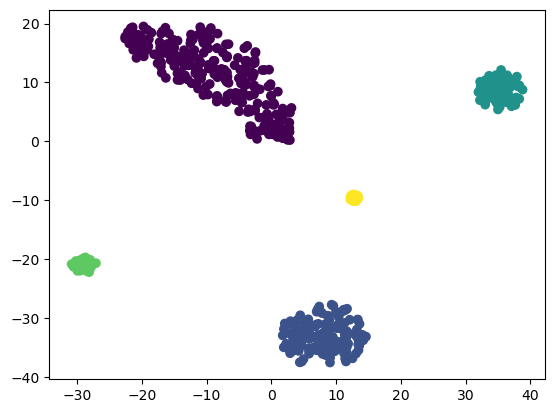

In [78]:
#Using the dataframe after scaling the means and variances

from sklearn.manifold import TSNE

# 1. create the TSNE object, call it tsne. Tell it you want 2 components (ie, a 2D projection) 
tsne = TSNE(n_components=2)
# 2. Fit the data to the model and transform to a new array (call it X_tsne) using tsne.fit_transform
#     This combines the fit and transform steps into a single operation.
X_tsne= tsne.fit_transform(df_scaled)

# Use this matplotlib command to make a scatter plot of the two components, colored by the 
#  kmeans cluster assignments
plt.scatter( X_tsne[:,0], X_tsne[:,1], c=clusters )
